In [10]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm 
tqdm.pandas()

import statsmodels.formula.api as smf
import numpy as np

from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Import Mobility Data

In [11]:
combined = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_combined.csv", dtype={'County_FIPS': 'str'} )

In [12]:
combined['StateCD'] = combined['State Code'] 

In [13]:
combined.shape

(1011313, 69)

In [14]:
combined.County_FIPS.unique().shape

(3131,)

## County Population Descriptions 

In [15]:
countylevel = combined.groupby("County_FIPS").max()

In [16]:
countylevel.Population_ACS.describe()

count       3131.00
mean      101459.88
std       327673.58
min           74.00
25%        10948.50
50%        25687.00
75%        67058.50
max     10105722.00
Name: Population_ACS, dtype: float64

In [17]:
plt.style.use('fivethirtyeight')

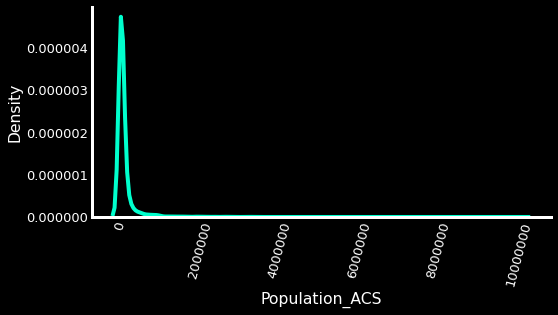

In [18]:
plt.rcParams.update({'font.size': 13})
plt.style.use("dark_background") 
sns.set_style({'axes.grid' : False})
sns.displot(countylevel.Population_ACS, height=4, aspect=1.8, color="#00ffcd", kind="kde")
plt.xticks(rotation=75)
plt.ticklabel_format(useOffset=False, style='plain')

## State Level Description of Deaths Per Capita on 2020-12-01

In [19]:
dec = combined[combined.Date == '2020-12-01']

In [20]:
statelevel = dec.groupby("StateCD").sum()

In [21]:
s2 = statelevel[['Deaths','Population_ACS']].reset_index()
s2['Deaths_PER_100K'] = s2['Deaths']/(s2['Population_ACS']/100000)
s2.sort_values(by="Deaths_PER_100K")

,StateCD,Deaths,Population_ACS,Deaths_PER_100K
46,VT,72,624636.00,11.53
21,ME,214,1330158.00,16.09
0,AK,122,737264.00,16.55
11,HI,242,1421572.00,17.02
44,UT,672,2993941.00,22.45
37,OR,936,4025127.00,23.25
47,WA,2802,7169967.00,39.08
50,WY,230,583200.00,39.44
30,NH,527,1331848.00,39.57
49,WV,758,1836843.00,41.27


## Yuma Example

In [22]:
yuma = combined[combined['locationcol'] == 'Yuma|Arizona']

In [23]:
yuma.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [24]:
sns.set(rc={'figure.figsize':(5,4)})

In [25]:
yuma1 = yuma[['Date','Deaths_New']]
yuma1.columns = ['Date','Deaths']
yuma1['Type'] = 'Deaths_New'

yuma2 = yuma[['Date','Deaths_New_RollingAvg']]
yuma2.columns = ['Date','Deaths']
yuma2['Type'] = 'Deaths_New_RollingAvg'

yuma3 = pd.concat([yuma1,yuma2])

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
yuma3

,Date,Deaths,Type
35207,2020-01-22,nan,Deaths_New
35208,2020-01-23,0.00,Deaths_New
35209,2020-01-24,0.00,Deaths_New
35210,2020-01-25,0.00,Deaths_New
35211,2020-01-26,0.00,Deaths_New
...,...,...,...
35525,2020-12-05,3.00,Deaths_New_RollingAvg
35526,2020-12-06,2.43,Deaths_New_RollingAvg
35527,2020-12-07,2.43,Deaths_New_RollingAvg
35528,2020-12-08,2.57,Deaths_New_RollingAvg


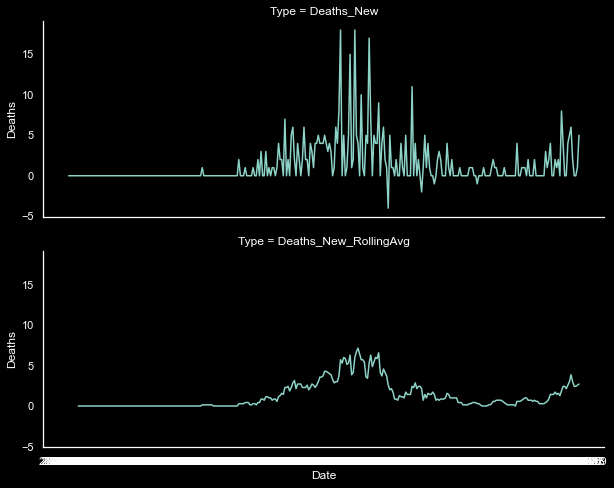

In [27]:
plt.rcParams.update({'font.size': 14})
plt.style.use("dark_background")
sns.set_style({'axes.grid' : False})
g = sns.FacetGrid(yuma3, row="Type",  height=3.5, aspect=2.5)
g.map(sns.lineplot, "Date", "Deaths")

In [28]:
def regress_two_var(df, X, Y, startdate = "2020-01-01", enddate = "2020-10-01"):
    # Cleaning up the dataframe
    df = df[df.Date >= startdate]
    df = df[df.Date <= enddate]
    df = df[df['{Y}'.format(Y=Y)].isna() == False]
    df = df[df['{X}'.format(X=X)].isna() == False]
    #dataframe["ratio"] = dataframe['{Y}'.format(Y=Y)]/dataframe['{X}'.format(X=X)]
    Xvar =  df['{X}'.format(X=X)].values.reshape(-1, 1) 
    Xvar1 = sm.add_constant(Xvar) # need to do this for statsmodels for some reason
    Yvar = df['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar1)
    res = mod.fit()
    print(res.summary())
    # Graph the regression
    linear_regressor = LinearRegression()  # create object for the class
    fitted_model = linear_regressor.fit(X=Xvar,y=Yvar)  # perform linear regression
    Y_pred = fitted_model.predict(Xvar)  # make predictions
    #return fitted_model
    plt.figure(figsize=(7,7))
    plt.scatter(y=Yvar, x=Xvar)
    plt.plot(Xvar, Y_pred, color='red')
    plt.title("{X} on {Y} Regression".format(X=X,Y=Y))
    plt.show()
    #Scatterplot to show data
    #sns.scatterplot(y='{Y}'.format(Y=Y),x='{X}'.format(X=X), hue="Division", data=df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 1.163e+06
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:28:48   Log-Likelihood:            -8.3529e+06
No. Observations:              795274   AIC:                         1.671e+07
Df Residuals:                  795272   BIC:                         1.671e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.914e+04     26.394   2998.511      0.0

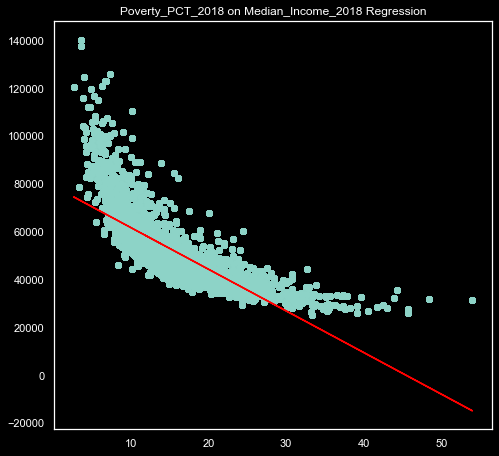

In [30]:
regress_two_var(df=combined,X="Poverty_PCT_2018",Y="Median_Income_2018")

In [31]:
def multivariate_ols(input_df, Y, Xlist):
    # Reshape the df to avoid NAs
    dataframe = input_df
    dataframe = dataframe[dataframe['{Y}'.format(Y=Y)].isna() == False]
    # Clean out any rows where one of these is NA -- can lead to data loss
    for i in Xlist:
        dataframe = dataframe[dataframe[i].isna() == False]
    # Check to ensure not too much thrown away
    pct_preserved = dataframe.shape[0]/input_df.shape[0]
    print("{pct} percent of the data preserved as non-NA".format(pct = 100*round(pct_preserved,2)))
    Xvar =  dataframe[Xlist]#.values.reshape(-1, len(Xlist)) 
    Xvar = sm.add_constant(Xvar)
    Yvar = dataframe['{Y}'.format(Y=Y)].values.reshape(-1, 1) 
    mod = sm.OLS(endog=Yvar,exog=Xvar,)
    res = mod.fit()
    print(res.summary())
    return res

In [32]:
Xlist = ['BACHELORS_PLUS_2018',"Poverty_PCT_2018" ]

multivariate_ols(input_df=combined, Y="residential_PCT_CFB_RollingAvg", Xlist=Xlist)

23.0 percent of the data preserved as non-NA
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 2.810e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:28:55   Log-Likelihood:            -7.0715e+05
No. Observations:              236968   AIC:                         1.414e+06
Df Residuals:                  236965   BIC:                         1.414e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Define list of all candidate predictors and then the possible outcomes

## Create list of formulas for all combinations

In [33]:
full_predictors = [
 'C(Metro)',
 #'HS_DIPLOMA_ONLY_2018',
 'PCT_Black_ACS',
 #'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 #'workplaces_PCT_CFB',
 #'residential_PCT_CFB_RollingAvg',
 'Poverty_PCT_2018',
 #'Median_Income_2018',
 #'C(Region)',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         #'Deaths_PER_100K'
         'Deaths_New_RollingAvg_PER_100K'
            ]

In [34]:
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return set(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

ps = powerset(full_predictors)
ps_list = [list(i) for i in ps]

In [35]:
def get_powerset_list_of_text(fp=full_predictors, yl=Ylist):
    ps = powerset(fp)
    ps_list = [list(i) for i in ps]
    textlist = []
    for i in ps_list:
        text = '|'
        for x in i:
            text = text+' + '+x
        textlist.append(text)
    textlist = [i.replace('| +','') for i in textlist if len(i) > 3] 
    full_form_list = []
    for i in textlist:
        for y in yl:
            full_form_list.append(y+" ~ "+i)
    print("The full list for {x} predictors and {y} outcome variables is {z} formulas long".format(x=str(len(fp)), y=str(len(yl)),z=str(len(full_form_list))) )
    return full_form_list
    

In [36]:
full_form_list = get_powerset_list_of_text(full_predictors, Ylist)

The full list for 5 predictors and 1 outcome variables is 31 formulas long


In [37]:
full_form_list
samp_list = full_form_list[0:50]

In [ ]:
#combined['Date_2'] = combined['Date'].astype('datetime64[ns]')
#combined['Month'] = combined['Date_2'].dt.month

## Define a Function for Formula-Based OLS

In [38]:
def start_end_mulivariate_ols(formulatxt, startdate="2020-06-01", enddate="2020-12-09", df=combined):
    segmented = df[df.Date > startdate]
    segmented = segmented[segmented.Date < enddate]
    mod = smf.ols(formula=formulatxt , data=segmented, missing='drop')
    res = mod.fit()
    #print(res.summary())
    return res

In [39]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt="""
Deaths_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + C(StateCD) + PCT_Black_ACS + C(Metro)""")
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     2028.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:29:55   Log-Likelihood:            -8.0348e+05
No. Observations:              161394   AIC:                         1.607e+06
Df Residuals:                  161336   BIC:                         1.608e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Test Formula for OLS

In [57]:
# Construct monthly daterange tuples

every_month = []
for i in range(4,9):
    a = '2020-0{c}-01'.format(c=i)
    b = '2020-0{c}-01'.format(c=i+1)
    every_month.append((a,b))
every_month.append(('2020-09-01','2020-10-01'))
every_month.append(('2020-10-01','2020-11-01'))
for i in range(10,12):
    a = '2020-{c}-01'.format(c=i)
    b = '2020-{c}-01'.format(c=i+1)
every_month.append((a,b))

In [58]:
every_3month =[
 ('2020-04-01', '2020-07-01'),
 ('2020-05-01', '2020-08-01'),
 ('2020-06-01', '2020-09-01'),
 ('2020-07-01', '2020-10-01'),
 ('2020-08-01', '2020-11-01'),
 ('2020-09-01', '2020-12-01'),
]


In [59]:
jun_dec =  [('2020-09-01', '2020-12-01')]

In [44]:
#dir(mod1)

## Function for running model and then graphing it over the different dateranges

In [45]:
def run_timeseries_models(formulatxt, list_dateranges, df):
    list_results = []
    for i in list_dateranges:
        res = start_end_mulivariate_ols(formulatxt = formulatxt, startdate = i[0], enddate = i[1], df=df)
        name = i[0]+"-"+i[1]
        list_results.append({"model":res,"start":i[0], "end":i[1]})
    
    resultslist = [{"bic":i['model'].bic, 
                    "aic":i['model'].aic, 
                    "start":i['start'], 
                    "end":i['end'], 
                    "r2_adj":i["model"].rsquared_adj,
                    "formula":formulatxt,
                    "n_obs":i['model'].nobs
                     } for i in list_results]
    return pd.DataFrame.from_dict(resultslist)
    
    
    
    

In [46]:
formulatxt = "Deaths_New_21_RollingAvg_PER_100K ~  residential_PCT_CFB_RollingAvg + C(StateCD)"

df = run_timeseries_models(formulatxt=formulatxt, list_dateranges=every_month, df=combined)

In [47]:
df

,bic,aic,start,end,r2_adj,formula,n_obs
0,27672.44,27267.95,2020-04-01,2020-05-01,0.50,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,17654.00
1,11521.31,11109.64,2020-05-01,2020-06-01,0.27,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,20268.00
2,9608.55,9194.51,2020-06-01,2020-07-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,21212.00
3,15090.70,14675.40,2020-07-01,2020-08-01,0.35,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,21732.00
4,13754.51,13331.99,2020-08-01,2020-09-01,0.22,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,24967.00
5,14643.36,14219.12,2020-09-01,2020-10-01,0.15,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,25808.00
6,41450.55,41014.98,2020-10-01,2020-11-01,0.16,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,32091.00
7,34925.92,34520.35,2020-11-01,2020-12-01,0.23,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,18021.00
8,191316.15,190800.82,2020-06-01,2020-12-01,0.07,Deaths_New_21_RollingAvg_PER_100K ~ residenti...,148764.00


## Run model and return dataframe showing the BIC, AIC, and R Squared

In [60]:
def graph_bic_adj2_TS(formulatxt, list_dateranges, df):
    df_graph = run_timeseries_models(formulatxt=formulatxt, list_dateranges=list_dateranges, df=df)
    plt.figure(figsize=(12,6))
    ax = sns.lineplot(x="start", y="bic", label="BIC", data=df_graph)
    plt.legend(loc="upper left")
    ax2 = ax.twinx()
    ax2 = sns.lineplot(x="start", y="r2_adj", label="R2_ADJ", color='red', data=df_graph)
    plt.title("BIC vs R2_ADJ")
    plt.legend(loc="upper right")
    print(formulatxt)
    print()

In [61]:
combined.columns

Index(['Unnamed: 0', 'Date', 'County_FIPS', 'State Code', 'Name',
       'retail_and_recreation_PCT_CFB', 'grocery_and_pharmacy_PCT_CFB',
       'parks_PCT_CFB', 'transit_stations_PCT_CFB', 'workplaces_PCT_CFB',
       'residential_PCT_CFB', 'retail_and_recreation_PCT_CFB_RollingAvg',
       'grocery_and_pharmacy_PCT_CFB_RollingAvg', 'parks_PCT_CFB_RollingAvg',
       'transit_stations_PCT_CFB_RollingAvg', 'workplaces_PCT_CFB_RollingAvg',
       'residential_PCT_CFB_RollingAvg', 'HS_DIPLOMA_ONLY_2018',
       'SOME_COLLEGE_2018', 'BACHELORS_PLUS_2018', 'Poverty_PCT_2018',
       'UrbanCD', 'Median_Income_2018', 'Population_ACS',
       'Population_Black_ACS', 'Population_Hisp_ACS', 'Population_Native_ACS',
       'PCT_Black_ACS', 'PCT_Hisp_ACS', 'PCT_Native_ACS',
       'UrbanCD_Description', 'Metro', 'State', 'Confirmed', 'Deaths',
       'Country/Region', 'Deaths_Previous', 'Confirmed_Previous', 'Deaths_New',
       'Deaths_New_7', 'Deaths_New_14', 'Deaths_New_21', 'Deaths_New_28',
 

In [62]:
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

residential_PCT_CFB_RollingAvg ~ Poverty_PCT_2018 + C(StateCD) + C(Metro) + Deaths_PER_100K



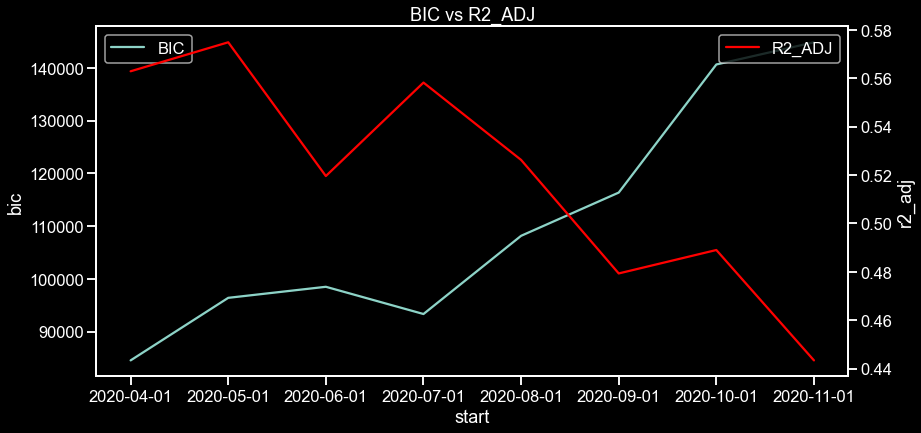

In [63]:
formula1 = """residential_PCT_CFB_RollingAvg ~ Poverty_PCT_2018 + C(StateCD) + C(Metro) + Deaths_PER_100K"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [64]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt=formula1)
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     residential_PCT_CFB_RollingAvg   R-squared:                       0.394
Model:                                        OLS   Adj. R-squared:                  0.394
Method:                             Least Squares   F-statistic:                     1872.
Date:                            Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                                    14:32:43   Log-Likelihood:            -3.8459e+05
No. Observations:                          161394   AIC:                         7.693e+05
Df Residuals:                              161337   BIC:                         7.699e+05
Df Model:                                      56                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

Deaths_PER_100K ~ Poverty_PCT_2018 + C(StateCD) + PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(Metro)



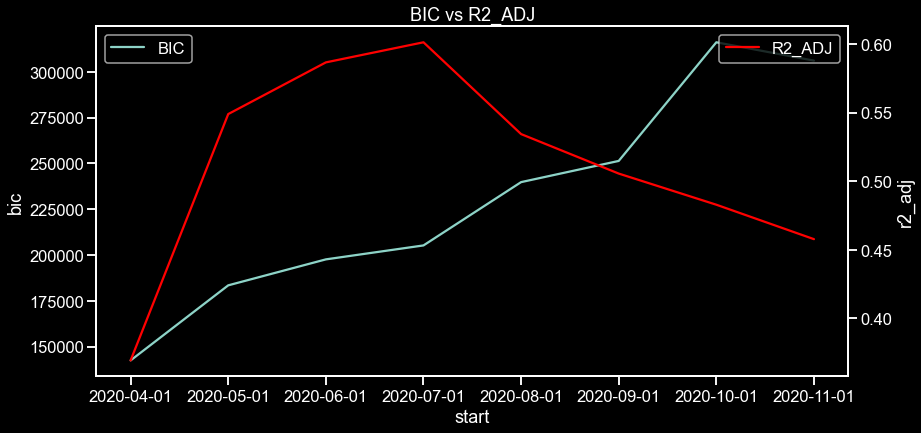

In [65]:
formula1 = """Deaths_PER_100K ~ Poverty_PCT_2018 + C(StateCD) + PCT_Black_ACS + residential_PCT_CFB_RollingAvg + C(Metro)"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

In [66]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-12-01", formulatxt=formula1)
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        Deaths_PER_100K   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     2028.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:32:54   Log-Likelihood:            -8.0348e+05
No. Observations:              161394   AIC:                         1.607e+06
Df Residuals:                  161336   BIC:                         1.608e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD



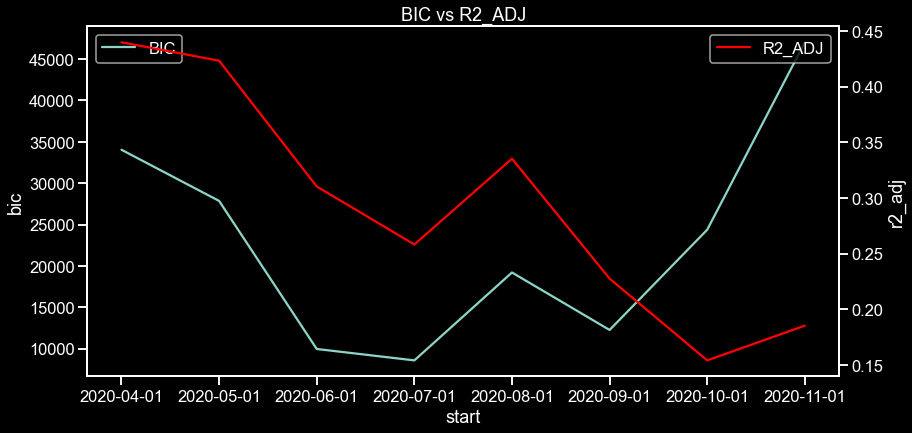

In [67]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + StateCD"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro



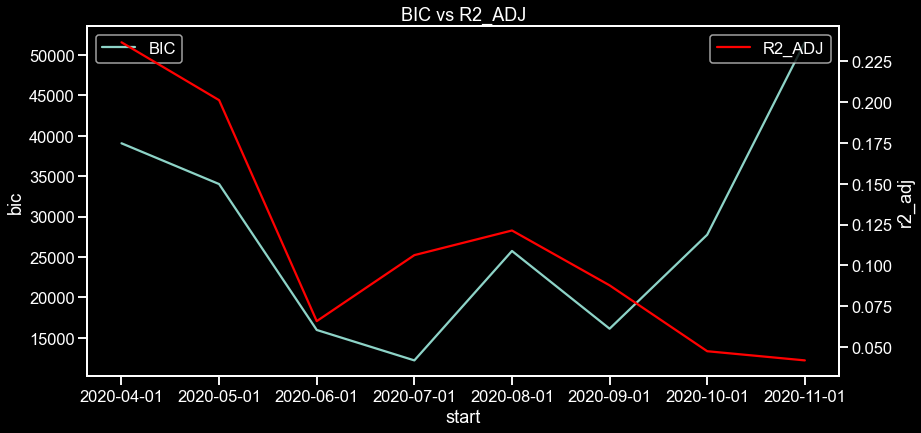

In [68]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ residential_PCT_CFB_RollingAvg + Poverty_PCT_2018 + Metro"""

graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

## List of all possible formulas for OLS 

In [69]:
full_form_list = get_powerset_list_of_text(full_predictors, Ylist)

The full list for 5 predictors and 1 outcome variables is 31 formulas long


In [70]:
list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=every_month, df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

100%|██████████| 31/31 [03:03<00:00,  5.91s/it]


In [71]:
bigdf = pd.concat(list_df)

In [72]:
bigdf['num_var'] = bigdf['formula'].str.count('\+')+1

bigdf['has_mob'] = bigdf['formula'].str.contains("CFB")

In [81]:
list_forms = list(bigdf.formula.unique())
list_forms_nomob =[i for i in list(bigdf['formula'].unique()) if "CFB" not in i]
list_forms_mob =[i for i in list(bigdf['formula'].unique()) if "CFB" in i]



b = bigdf[bigdf.formula.isin(list_forms_nomob)].groupby("formula").mean().sort_values(by="num_var",ascending=False)
b_post06 = bigdf[bigdf.formula.isin(list_forms_nomob) & (bigdf.start >= '2020-06-01')].groupby("formula").mean().sort_values(by="num_var",ascending=False)


c = bigdf[bigdf.formula.isin(list_forms_mob)].groupby("formula").mean().sort_values(by="num_var",ascending=False)

d = bigdf.groupby("formula").mean().sort_values(by="num_var",ascending=False)

In [82]:
b_post06[b.num_var.isin([3,4,5,6,7,8])].sort_values(by="bic", ascending=True).head(50)

,bic,aic,r2_adj,n_obs,num_var,has_mob
formula,,,,,,
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),234186.20,233639.06,0.11,92364.50,5,False
Deaths_New_RollingAvg_PER_100K ~ PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),234282.90,233773.50,0.10,92364.50,4,False
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),234305.02,233767.31,0.10,92364.50,4,False
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + C(StateCD),234392.50,233854.80,0.10,92364.50,4,False
Deaths_New_RollingAvg_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD),234430.80,233930.83,0.10,92364.50,3,False
Deaths_New_RollingAvg_PER_100K ~ PCT_Black_ACS + Confirmed_New_RollingAvg_PER_100K + C(StateCD),234634.80,234134.83,0.10,92364.50,3,False
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + Confirmed_New_RollingAvg_PER_100K + C(StateCD),234665.20,234136.93,0.10,92364.50,3,False
Deaths_New_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD),236331.42,235793.72,0.08,92364.50,4,False
Deaths_New_RollingAvg_PER_100K ~ PCT_Black_ACS + Poverty_PCT_2018 + C(StateCD),236433.24,235933.27,0.08,92364.50,3,False


Text(0.5, 1.0, 'Regression Models by Adjusted R Squared and Number of Variables \nPredicting Deaths_New_RollingAvg_PER_100K \n Mobility not included')

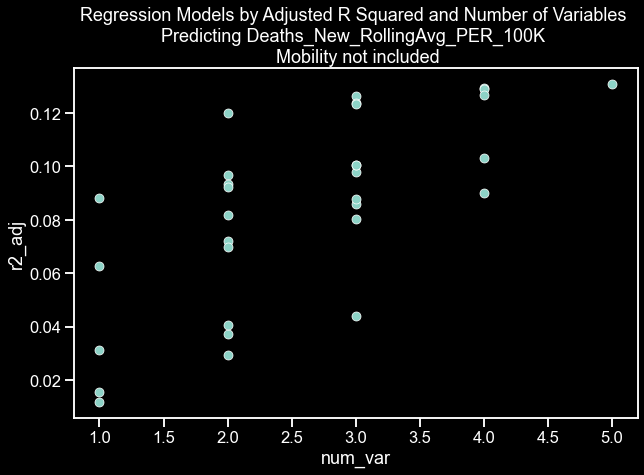

In [126]:
plt.figure(figsize=(9,6))
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.scatterplot(y="r2_adj", x="num_var", data=b)
plt.title("Regression Models by Adjusted R Squared and Number of Variables \nPredicting Deaths_New_RollingAvg_PER_100K \n Mobility not included")

Text(0.5, 1.0, 'Regression Models by Adjusted R Squared and Number of Variables \nPredicting Deaths_New_RollingAvg_PER_100K')

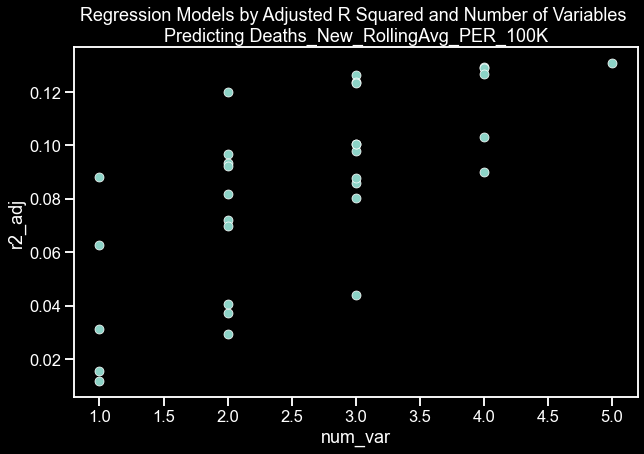

In [125]:
plt.figure(figsize=(9,6))
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.scatterplot(y="r2_adj", x="num_var", data=d)
plt.title("Regression Models by Adjusted R Squared and Number of Variables \nPredicting Deaths_New_RollingAvg_PER_100K")

Text(0.5, 1.0, 'Adjusted R Squared vs Start Date of 1-Month Regression \nPredicting Deaths_New_RollingAvg_PER_100K')

<Figure size 648x432 with 0 Axes>

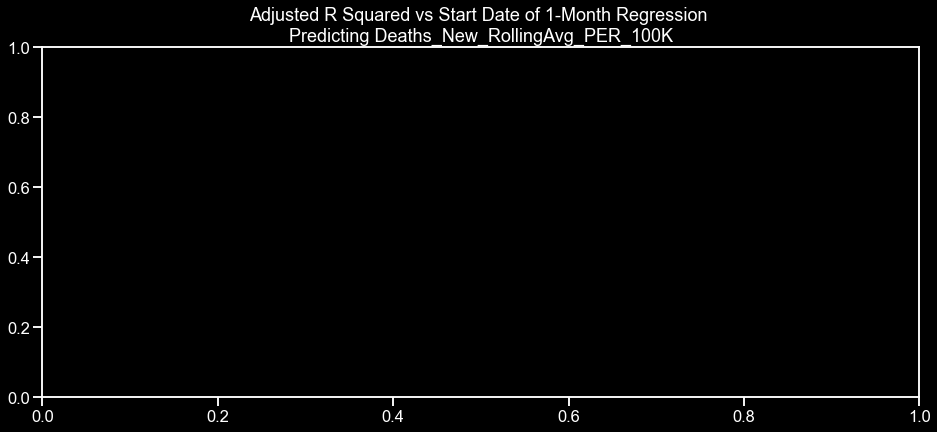

In [127]:
plt.figure(figsize=(9,6))
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


bigdf_hasmob = bigdf[bigdf.has_mob == True]
bigdf_nomob = bigdf[bigdf.has_mob == False]


plt.figure(figsize=(14,6))
sns.scatterplot(y="r2_adj", x="start", size = "num_var", data=bigdf_hasmob)
plt.title("Adjusted R Squared vs Start Date of 1-Month Regression \nPredicting Deaths_New_RollingAvg_PER_100K")

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(y="r2_adj", x="start", size = "num_var", data=bigdf_nomob)
plt.title("Adjusted R Squared vs Start Date of 1-Month Regression \nPredicting Deaths_New_RollingAvg_PER_100K")
plt.legend()


Deaths_New_RollingAvg_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + C(StateCD) +  Poverty_PCT_2018


                                  OLS Regression Results                                  
Dep. Variable:     Deaths_New_RollingAvg_PER_100K   R-squared:                       0.101
Model:                                        OLS   Adj. R-squared:                  0.101
Method:                             Least Squares   F-statistic:                     1235.
Date:                            Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                                    14:51:29   Log-Likelihood:            -8.0917e+05
No. Observations:                          569842   AIC:                         1.618e+06
Df Residuals:                              569789   BIC:                         1.619e+06
Df Model:                                      52                                         
Covariance Type:                        nonrobust                             

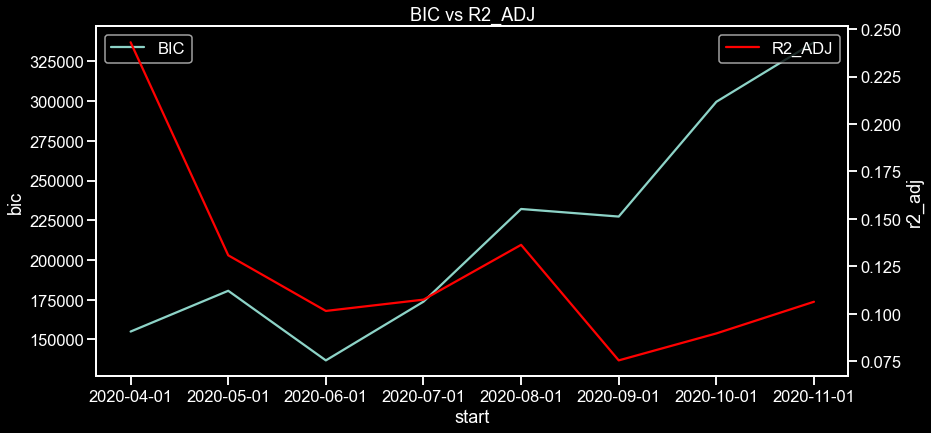

In [99]:
formula1 = """
Deaths_New_RollingAvg_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + C(StateCD) +  Poverty_PCT_2018
"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-12-01', df= combined)
print(mod2.summary())

In [116]:
combined.PCT_Black_ACS.describe()

count   1011313.00
mean          9.02
std          14.52
min           0.00
25%           0.64
50%           2.22
75%          10.23
max          86.92
Name: PCT_Black_ACS, dtype: float64

In [114]:
combined_samp = combined.sample(frac=.1)

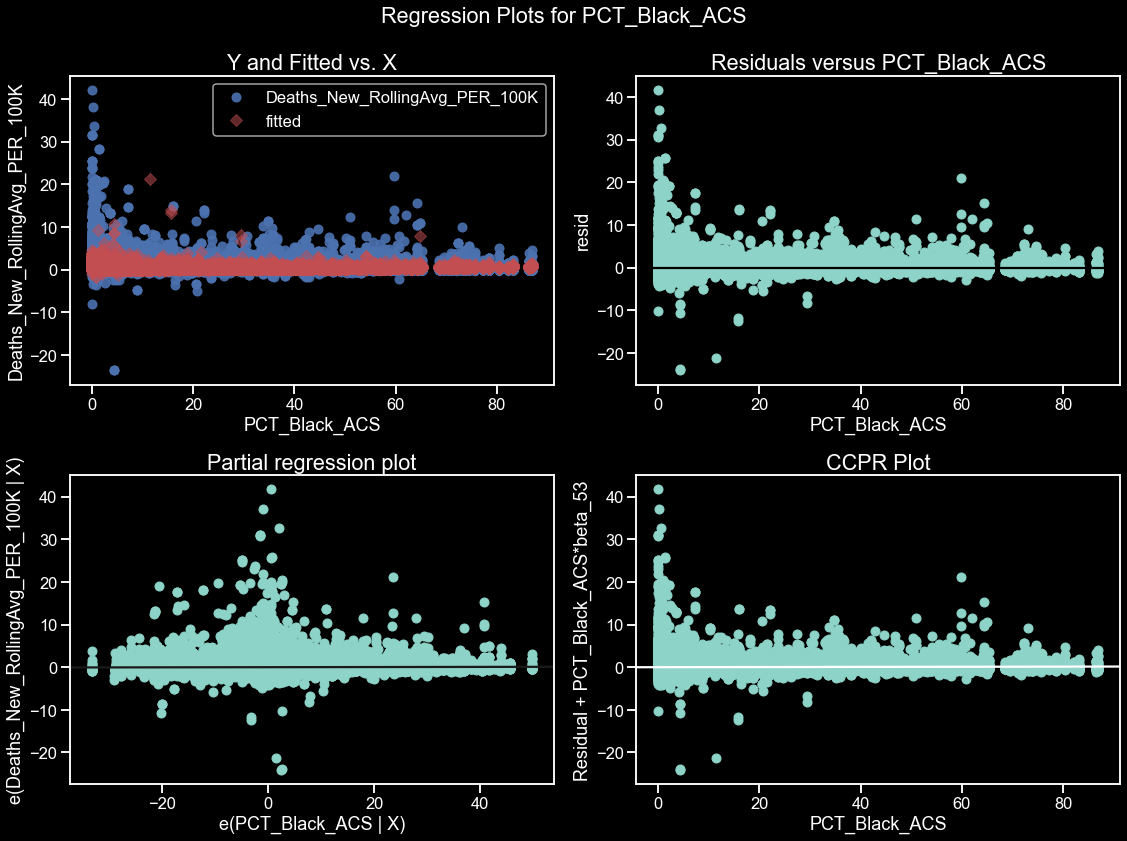

In [115]:
#define figure size
fig = plt.figure(figsize=(16,12))
results = smf.ols('Deaths_New_RollingAvg_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + C(StateCD) +  Poverty_PCT_2018 + PCT_Black_ACS',
                  data=combined_samp).fit()

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'PCT_Black_ACS', fig=fig)

In [ ]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ C(Metro) + PCT_Black_ACS + BACHELORS_PLUS_2018 + Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + Median_Income_2018 + C(StateCD)"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-12-01', df= combined)
print(mod2.summary())

In [ ]:
formula1 = """Deaths_New_RollingAvg_PER_100K ~ Confirmed_New_RollingAvg_PER_100K + Poverty_PCT_2018 + C(StateCD)"""
graph_bic_adj2_TS(formulatxt=formula1, list_dateranges=every_month, df=combined)

mod2 = start_end_mulivariate_ols(formulatxt=formula1, startdate='2020-06-01', enddate='2020-12-01', df= combined)
print(mod2.summary())

In [ ]:
combined.columns

## Detecting and managing Multicolinearity & VIF

In [ ]:
#Sources: https://etav.github.io/python/vif_factor_python.html
        # https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/ 

In [ ]:
#https://etav.github.io/python/vif_factor_python.html

combined_1day = combined[combined.Date == "2020-10-08"]


cols_subset = ["Metro","PCT_Black_ACS",'PCT_Native_ACS',"PCT_Hisp_ACS", 
               "BACHELORS_PLUS_2018","HS_DIPLOMA_ONLY_2018", "Median_Income_2018",
               "Poverty_PCT_2018","Deaths_PER_100K", "StateCD", "Region", "residential_PCT_CFB_RollingAvg"
              ] 
combined_sub2 = combined[cols_subset]

sns.set(rc={'figure.figsize':(11,8)})
corr = combined_sub2.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#combined_sub2_long = pd.get_dummies(combined_sub2, columns=["Metro","StateCD"])
()

list_col = list(cols_subset)
#list_col = [i for i in list_col if "Death" not in i and "RollingAvg" not in i]
#list_col.remove("State Code")
list_col.remove("Deaths_PER_100K")

features = "+".join(list_col)


y, X = dmatrices("Deaths_PER_100K ~"+features, combined_sub2, return_type='dataframe')

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vifs = vif.round(1).sort_values(by="VIF Factor", ascending=False)

In [ ]:
vifs[(vifs["features"].str.contains("State") == False) & (vifs["VIF Factor"] != np.inf)]

## All subsets for county-level regressions

In [ ]:
full_predictors = [
 'C(Metro)',
 'PCT_Black_ACS',
 #'BACHELORS_PLUS_2018',
 'Confirmed_New_RollingAvg_PER_100K',
 #'PCT_Hispanic_ACS',
 #'PCT_Native_ACS',
 'Poverty_PCT_2018',
 'C(StateCD)',
    
]

Ylist = [#'Deaths_New_7_RollingAvg_PER_100K',
         #'Deaths_New_14_RollingAvg_PER_100K',
         #'Deaths_New_28_RollingAvg_PER_100K',
         'Deaths_PER_100K'
         #'Deaths_New_RollingAvg_PER_100K'
            ]

In [ ]:
list_df = []
for i in tqdm(full_form_list):
    try:
        df = run_timeseries_models(formulatxt=i, list_dateranges=every_month, df=combined)
        list_df.append(df)
    except:
        print("Error for {i}".format(i=i))

In [ ]:
bigdf_county = pd.concat(list_df)
bigdf_county['num_var'] = bigdf_county['formula'].str.count('\+')+1

In [ ]:
list_forms = list(bigdf_county.formula.unique())
list_forms =[i for i in list(bigdf_county['formula'].unique()) if "Confirmed" not in i and "CFB" not in i and "StateCD" not in i]


bigdf_county[bigdf_county.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="r2_adj",ascending=False).head(30)

In [ ]:
bigdf_county[bigdf_county.formula.isin(list_forms)].groupby("formula").mean().sort_values(by="bic",ascending=True).head(30)

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-07-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD + Metro""")
print(mod1.summary())

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-04-01", enddate = "2020-06-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-06-01", enddate = "2020-09-01", formulatxt="""
Deaths_New_21_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-12-01", formulatxt="""
Deaths_New_14_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K + StateCD""")
print(mod1.summary())

In [ ]:
mod1 = start_end_mulivariate_ols(startdate = "2020-10-01", enddate = "2020-12-01", formulatxt="""
Deaths_New_14_RollingAvg_PER_100K ~  Confirmed_New_RollingAvg_PER_100K """)
print(mod1.summary())